In [1]:
import geopandas
from geopandas import GeoSeries

In [2]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [3]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [4]:
world.geometry.name

'geometry'

In [5]:
world = world.rename(columns={'geometry': 'borders'}).set_geometry('borders')
world.geometry.name

'borders'

<AxesSubplot:>

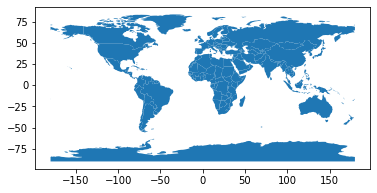

In [6]:
world.plot()

C:\Users\niharika.a.kumari\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


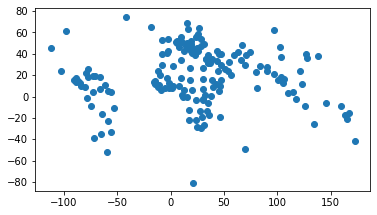

In [7]:
world['centroid_column'] = world.centroid

world = world.set_geometry('centroid_column')

world.plot();

In [8]:
world.area

C:\Users\niharika.a.kumari\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
172    0.0
173    0.0
174    0.0
175    0.0
176    0.0
Length: 177, dtype: float64

In [9]:
world.shape

(177, 7)

In [10]:
geopandas.options

Options(
  display_precision: None [default: None]
      The precision (maximum number of decimals) of the coordinates in the
      WKT representation in the Series/DataFrame display. By default (None),
      it tries to infer and use 3 decimals for projected coordinates and 5
      decimals for geographic coordinates.
  use_pygeos: False [default: False]
      Whether to use PyGEOS to speed up spatial operations. The default is
      True if PyGEOS is installed, and follows the USE_PYGEOS environment
      variable if set.
  )

In [11]:
geopandas.options.display_precision = 2

In [12]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,borders,centroid_column
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00 -16.07, 180.00 -16.56, ...",POINT (163.85 -17.32)
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90 -0.95, 34.07 -1.06, 37.70 -3.1...",POINT (34.75 -6.26)
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.67 27.66, -8.67 27.59, -8.68 27.4...",POINT (-12.14 24.29)
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84 49.00, -122.97 49.00, ...",POINT (-98.14 61.47)
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84 49.00, -120.00 49.00, ...",POINT (-112.60 45.71)


In [13]:
countries_gdf = geopandas.read_file(r"natural_earth_vector.gpkg\packages\natural_earth_vector.gpkg",layer='ne_110m_coastline')

In [14]:
this = countries_gdf.loc[0][3]

<AxesSubplot:>

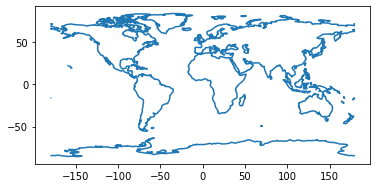

In [15]:
countries_gdf.plot()

In [16]:
import fiona
for layername in fiona.listlayers(r"natural_earth_vector.gpkg\packages\natural_earth_vector.gpkg"):
    with fiona.open(r"natural_earth_vector.gpkg\packages\natural_earth_vector.gpkg", layer=layername) as src:
        print(layername, len(src))

ne_10m_admin_0_antarctic_claim_limit_lines 23
ne_10m_admin_0_antarctic_claims 10
ne_10m_admin_0_boundary_lines_disputed_areas 46
ne_10m_admin_0_boundary_lines_land 462
ne_10m_admin_0_boundary_lines_map_units 15
ne_10m_admin_0_boundary_lines_maritime_indicator 223
ne_10m_admin_0_countries 255
ne_10m_admin_0_countries_lakes 255
ne_10m_admin_0_disputed_areas 80
ne_10m_admin_0_disputed_areas_scale_rank_minor_islands 213
ne_10m_admin_0_label_points 7088
ne_10m_admin_0_map_subunits 357
ne_10m_admin_0_map_units 295
ne_10m_admin_0_pacific_groupings 63
ne_10m_admin_0_scale_rank 4316
ne_10m_admin_0_scale_rank_minor_islands 7106
ne_10m_admin_0_seams 26
ne_10m_admin_0_sovereignty 206
ne_10m_admin_1_label_points 11284
ne_10m_admin_1_label_points_details 4647
ne_10m_admin_1_seams 12
ne_10m_admin_1_states_provinces 4594
ne_10m_admin_1_states_provinces_lakes 4593
ne_10m_admin_1_states_provinces_lines 10114
ne_10m_admin_1_states_provinces_scale_rank 8534
ne_10m_admin_1_states_provinces_scale_rank_minor

In [17]:
url = "http://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_land.geojson"
df = geopandas.read_file(url)

<AxesSubplot:>

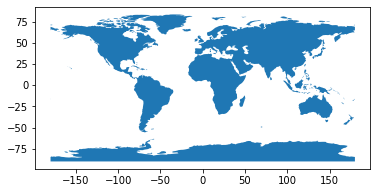

In [18]:
df.plot()

### Bounding Box Filter
The bounding box filter only loads data that intersects with the bounding box.

In [19]:
bbox = (1031051.7879884212, 224272.49231459625, 1047224.3104931959, 244317.30894023244)
countries_gdf = geopandas.read_file(r"natural_earth_vector.gpkg\packages\natural_earth_vector.gpkg",layer='ne_110m_coastline',bbox=bbox)

In [20]:
countries_gdf.head()

,scalerank,featurecla,min_zoom,geometry


In [21]:
# bbox = (1031051.7879884212, 224272.49231459625, 1047224.3104931959, 244317.30894023244)
bbox = this
countries_gdf = geopandas.read_file(r"natural_earth_vector.gpkg\packages\natural_earth_vector.gpkg",layer='ne_110m_coastline',bbox=bbox)

<AxesSubplot:>

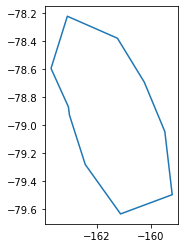

In [22]:
countries_gdf.plot()

In [23]:
this.bounds

(-163.7128956777287,
 -79.63420867301133,
 -159.20818356019765,
 -78.22333871857859)

### Row Filter

In [24]:
countries_gdf = geopandas.read_file(r"natural_earth_vector.gpkg\packages\natural_earth_vector.gpkg",layer='ne_110m_coastline',rows = 10)

<AxesSubplot:>

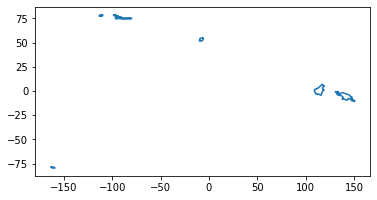

In [25]:
countries_gdf.plot()

<AxesSubplot:>

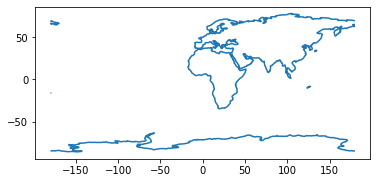

In [26]:
countries_gdf = geopandas.read_file(r"natural_earth_vector.gpkg\packages\natural_earth_vector.gpkg",layer='ne_110m_coastline',rows = slice(90,100))
countries_gdf.plot()

### Exporting File

In [27]:
import fiona
fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'rw',
 'GML': 'raw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r',
 'TopoJSON': 'r'}

In [28]:
countries_gdf.to_file("countries.shp")
#5 files created .cpg, .dbf, .prj, AutoCAD shape source, AutoCAD compiled shape

In [29]:
countries_gdf.to_file("countries.geojson", driver='GeoJSON')
# one .geojson file created

<AxesSubplot:>

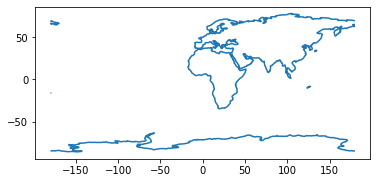

In [30]:
countries_gdf = geopandas.read_file("countries.geojson")
countries_gdf.plot()

In [31]:
countries_gdf

,scalerank,featurecla,min_zoom,geometry
0,1,Coastline,1.0,"LINESTRING (14.76 38.14, 15.52 38.23, 15.16 37..."
1,0,Coastline,0.0,"LINESTRING (37.54 44.66, 38.68 44.28, 39.96 43..."
2,1,Coastline,1.5,"LINESTRING (132.37 33.46, 132.92 34.06, 133.49..."
3,0,Coastline,0.0,"LINESTRING (-16.26 19.10, -16.38 19.59, -16.28..."
4,0,Coastline,0.0,"LINESTRING (180.00 64.98, 178.71 64.53, 177.41..."
5,0,Coastline,0.0,"LINESTRING (-177.55 68.20, -180.00 68.96)"
6,1,Coastline,1.5,"LINESTRING (-180.00 -16.07, -179.79 -16.02, -1..."
7,1,Coastline,1.0,"LINESTRING (125.95 -8.43, 126.64 -8.40, 126.96..."
8,0,Coastline,0.0,"LINESTRING (-180.00 -84.71, -179.94 -84.72, -1..."
9,0,Coastline,0.0,"LINESTRING (-180.00 68.96, -177.55 68.20, -174..."


### Indexing and Selecting Data
Support .loc and .iloc.  
In addition, GeoPandas also provides coordinate based indexing with the cx indexer, which slices using a bounding box. Geometries in the GeoSeries or GeoDataFrame that intersect the bounding box will be returned.

<AxesSubplot:>

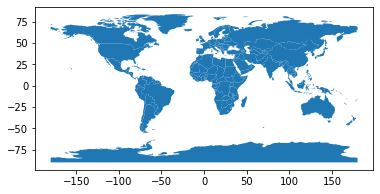

In [32]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
southern_world = world.cx[:, :100]
southern_world.plot(figsize=(10, 3))

Choropleth maps (maps where the color of each shape is based on the value of an associated variable)    

In [33]:
import matplotlib.pyplot as plt

<AxesSubplot:>

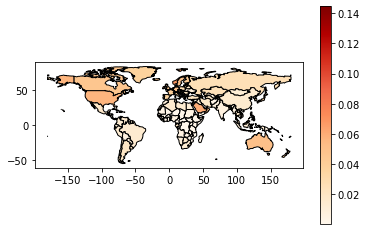

In [34]:
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

fig, ax = plt.subplots(1, 1)
world.plot(column='gdp_per_cap',ax=ax, legend=True, cmap='OrRd',edgecolor='black')

## CRS
Co-ordinate referencing system

There are two relevant operations for projections: Setting a projection and re-projecting. Most of the time you don’t have to set a projection. Data loaded from a reputable source (using the geopandas.read_file() command) should always include projection information.

Re-projecting is the process of changing the representation of locations from one coordinate system to another.

In [35]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [36]:
#Setting a Projection
my_geoseries = world.set_crs(epsg=4326)
my_geoseries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

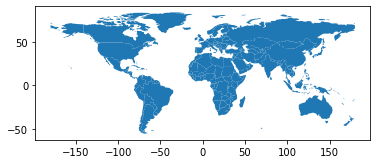

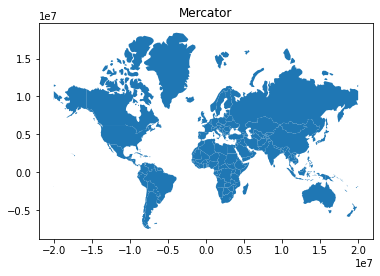

In [37]:
#Re Projection
world.plot()
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]
world = world.to_crs("EPSG:3395") # world.to_crs(epsg=3395) would also work
ax = world.plot()
ax.set_title("Mercator");

### Geometric Manipulations
geopandas makes available all the tools for geometric manipulations in the *shapely* library.

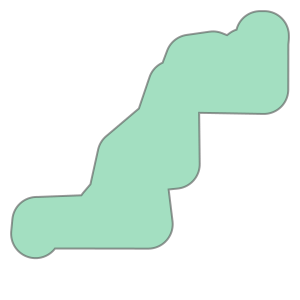

In [38]:
world.buffer(100000, resolution=20)[2]

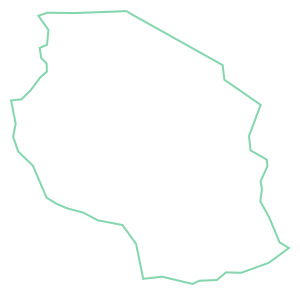

In [39]:
world.boundary[1]

<AxesSubplot:>

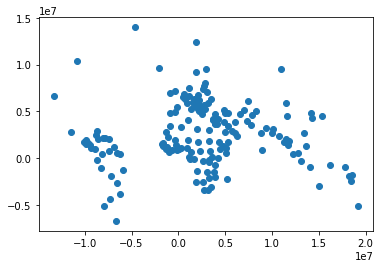

In [40]:
world.centroid.plot()

convex_hull:  Returns a GeoSeries of geometries representing the smallest convex Polygon containing all the points in each object unless the number of points in the object is less than three. For two points, the convex hull collapses to a LineString; for 1, a Point.

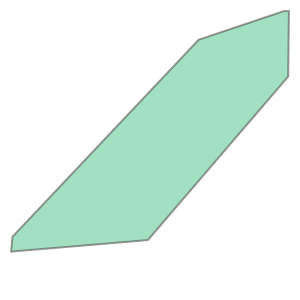

In [41]:
world.convex_hull[2]

In [42]:
world.envelope

0      POLYGON ((-20037508.34 -2057883.77, 20037508.3...
1      POLYGON ((3266113.59 -1305291.04, 4488022.27 -...
2      POLYGON ((-1899491.58 2376543.34, -964597.24 2...
3      POLYGON ((-15695801.07 5084017.33, -5860759.54...
4      POLYGON ((-19123698.96 2131225.94, -7454471.85...
                             ...                        
172    POLYGON ((2096126.51 5169049.08, 2558791.88 51...
173    POLYGON ((2053846.48 5114123.91, 2264216.18 51...
174    POLYGON ((2234260.10 5109590.82, 2423987.48 51...
175    POLYGON ((-6896242.45 1111475.10, -6778800.39 ...
176    POLYGON ((2659086.40 388270.18, 3929356.18 388...
Length: 175, dtype: geometry

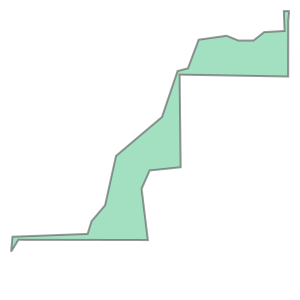

In [43]:
world.simplify(1, preserve_topology=True)[2]

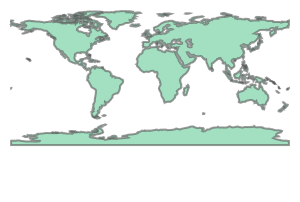

In [79]:
world.unary_union

### Affine Transformations

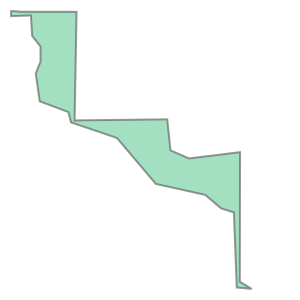

In [46]:
world.rotate(90, origin='center', use_radians=False)[2]

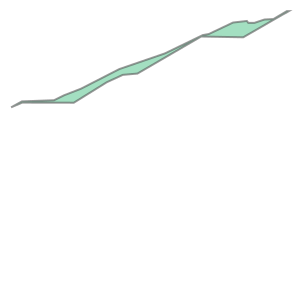

In [47]:
world.skew(60, origin='center', use_radians=False)[2]

GeoPandas also implements alternate constructors that can read any data format recognized by fiona. To read a zip file containing an ESRI shapefile with the borough boundaries of New York City (GeoPandas includes this as an example dataset):

In [48]:
nybb_path = geopandas.datasets.get_path('nybb')
boros = geopandas.read_file(nybb_path)
boros.set_index('BoroCode', inplace=True)
boros.sort_index(inplace=True)
boros

,BoroName,Shape_Leng,Shape_Area,geometry
BoroCode,,,,
1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.06 188655.32, 980940.52..."
2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.81 229228.26, 1012785...."
3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.48 151374.80, 1021002...."
4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.08 156073.81, 1029578...."
5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.02 145643.33, 970227.22..."


<AxesSubplot:>

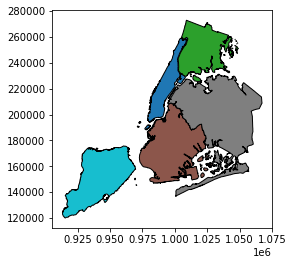

In [49]:
boros.plot(cmap='tab10',edgecolor='k')

In [50]:
boros.shape

(5, 4)

<AxesSubplot:>

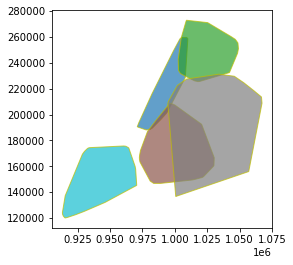

In [51]:
boros['geometry'].convex_hull.plot(cmap='tab10',edgecolor='y',alpha=0.7)

### Intersection operation

<AxesSubplot:>

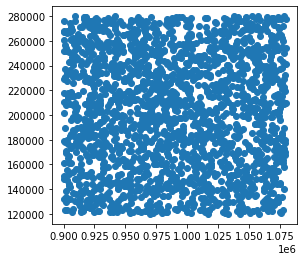

In [52]:
import numpy as np
from shapely.geometry import Point
xmin, xmax, ymin, ymax = 900000, 1080000, 120000, 280000
xc = (xmax - xmin) * np.random.random(2000) + xmin
yc = (ymax - ymin) * np.random.random(2000) + ymin
pts = GeoSeries([Point(x, y) for x, y in zip(xc, yc)])
pts.plot()

In [53]:
circles = pts.buffer(2000)

<AxesSubplot:>

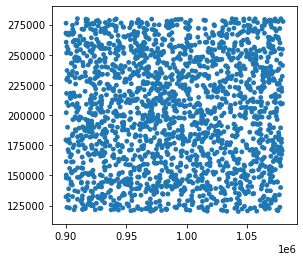

In [54]:
circles.plot()

In [55]:
mp = circles.unary_union # take a union of all these circles to get one large polygon instead of many small ones
holes = boros['geometry'].intersection(mp)

<AxesSubplot:>

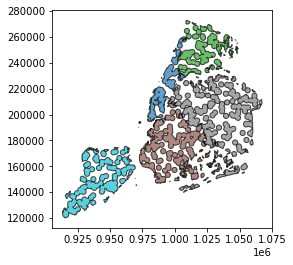

In [56]:
holes.plot(cmap='tab10',edgecolor='k',alpha=0.7)

<AxesSubplot:>

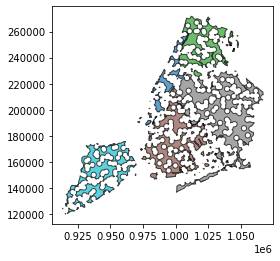

In [57]:
boros_with_holes = boros['geometry'].difference(mp)
boros_with_holes.plot(cmap='tab10',edgecolor='k',alpha=0.7)

Note that this can be simplified a bit, since geometry is available as an attribute on a GeoDataFrame, and the intersection and difference methods are implemented with the “&” and “-” operators, respectively. For example, the latter could have been expressed simply as boros.geometry - mp.

C:\Users\niharika.a.kumari\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: DeprecationWarning: '-' operator will be deprecated. Use the 'difference' method instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

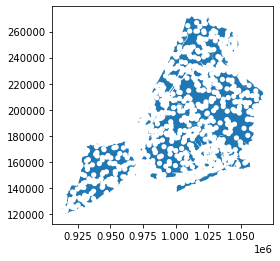

In [58]:
(boros.geometry - mp).plot()

#### Intersections, unions, and differences- These types of operations are made available in the geopandas library through the overlay function.

In [59]:
from shapely.geometry import Polygon

polys1 = geopandas.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]),
                               Polygon([(2,2), (4,2), (4,4), (2,4)])])
polys2 = geopandas.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)]),
                              Polygon([(3,3), (5,3), (5,5), (3,5)])])
df1 = geopandas.GeoDataFrame({'geometry': polys1, 'df1':[1,2]})
df2 = geopandas.GeoDataFrame({'geometry': polys2, 'df2':[1,2]})

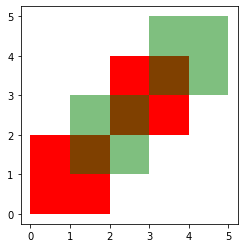

In [60]:
ax = df1.plot(color='red');

df2.plot(ax=ax, color='green', alpha=0.5);

In [61]:
res_union = geopandas.overlay(df1, df2, how='union')
res_union

,df1,df2,geometry
0,1.0,1.0,"POLYGON ((1.00 2.00, 2.00 2.00, 2.00 1.00, 1.0..."
1,2.0,1.0,"POLYGON ((2.00 2.00, 2.00 3.00, 3.00 3.00, 3.0..."
2,2.0,2.0,"POLYGON ((3.00 4.00, 4.00 4.00, 4.00 3.00, 3.0..."
3,1.0,NaN,"POLYGON ((0.00 0.00, 0.00 2.00, 1.00 2.00, 1.0..."
4,2.0,NaN,"MULTIPOLYGON (((2.00 3.00, 2.00 4.00, 3.00 4.0..."
5,NaN,1.0,"MULTIPOLYGON (((1.00 2.00, 1.00 3.00, 2.00 3.0..."
6,NaN,2.0,"POLYGON ((3.00 4.00, 3.00 5.00, 5.00 5.00, 5.0..."


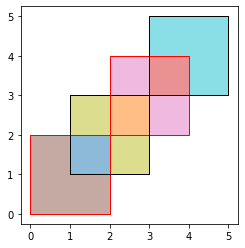

In [62]:
ax = res_union.plot(alpha=0.5,cmap='tab10')
df1.plot(ax=ax, facecolor='none', edgecolor='r');
df2.plot(ax=ax, facecolor='none', edgecolor='k');

In [63]:
res_intersection = geopandas.overlay(df1, df2, how='intersection')
res_intersection

,df1,df2,geometry
0,1,1,"POLYGON ((1.00 2.00, 2.00 2.00, 2.00 1.00, 1.0..."
1,2,1,"POLYGON ((2.00 2.00, 2.00 3.00, 3.00 3.00, 3.0..."
2,2,2,"POLYGON ((3.00 4.00, 4.00 4.00, 4.00 3.00, 3.0..."


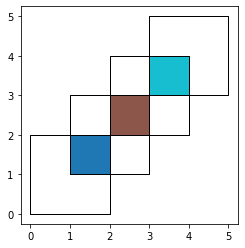

In [64]:
ax = res_intersection.plot(cmap='tab10')
df1.plot(ax=ax, facecolor='none', edgecolor='k');
df2.plot(ax=ax, facecolor='none', edgecolor='k');

Try the same thing for how='symmetric_difference' and how='difference'


Finally, with how='identity', the result consists of the surface of df1, but with the geometries obtained from overlaying df1 with df2

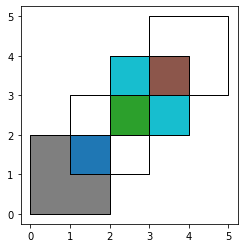

In [65]:
res_identity = geopandas.overlay(df1, df2, how='identity')
ax = res_identity.plot(cmap='tab10')
df1.plot(ax=ax, facecolor='none', edgecolor='k');
df2.plot(ax=ax, facecolor='none', edgecolor='k');

In [66]:
countries = world[world['continent'] == "South America"]
countries = countries[['geometry', 'name']]
countries = countries.to_crs('epsg:3395')
capitals = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
capitals = capitals.to_crs('epsg:3395')

<AxesSubplot:>

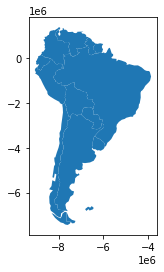

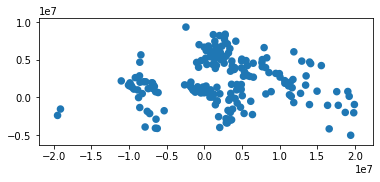

In [67]:
countries.plot();
capitals['geometry']= capitals.buffer(500000)
capitals.plot()

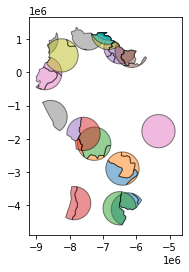

In [68]:
#portion of countries within 500km of a capital, we specify the how option to be “intersect”, which creates a new set of polygons where these two layers overlap:
country_cores = geopandas.overlay(countries, capitals, how='intersection')
country_cores.plot(alpha=0.5, edgecolor='k', cmap='tab10');

### Aggregation with Dissolve
At times we are more granular than we need, for eg, suppose we are interested in continent level data but all we have is data for countries. In tabular data, we can simply do groupby, but when geometry is concerened, we need a different method - dissolve

In [69]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

world = world[['continent', 'geometry']]

world

,continent,geometry
0,Oceania,"MULTIPOLYGON (((180.00 -16.07, 180.00 -16.56, ..."
1,Africa,"POLYGON ((33.90 -0.95, 34.07 -1.06, 37.70 -3.1..."
2,Africa,"POLYGON ((-8.67 27.66, -8.67 27.59, -8.68 27.4..."
3,North America,"MULTIPOLYGON (((-122.84 49.00, -122.97 49.00, ..."
4,North America,"MULTIPOLYGON (((-122.84 49.00, -120.00 49.00, ..."
...,...,...
172,Europe,"POLYGON ((18.83 45.91, 18.83 45.91, 19.60 46.1..."
173,Europe,"POLYGON ((20.07 42.59, 19.80 42.50, 19.74 42.6..."
174,Europe,"POLYGON ((20.59 41.86, 20.52 42.22, 20.28 42.3..."
175,North America,"POLYGON ((-61.68 10.76, -61.11 10.89, -60.90 1..."


,geometry
continent,
Africa,"MULTIPOLYGON (((49.54 -12.47, 49.81 -12.90, 50..."
Antarctica,"MULTIPOLYGON (((-163.71 -78.60, -163.71 -78.60..."
Asia,"MULTIPOLYGON (((120.30 -10.26, 118.97 -9.56, 1..."
Europe,"MULTIPOLYGON (((-51.66 4.16, -52.25 3.24, -52...."
North America,"MULTIPOLYGON (((-61.68 10.76, -61.11 10.89, -6..."


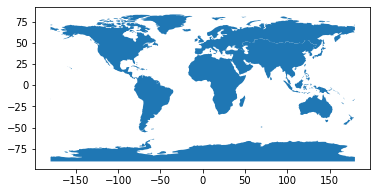

In [70]:
continents = world.dissolve(by='continent')

continents.plot();

continents.head()

### Merging Data
There are two ways to combine datasets in geopandas – attribute joins and spatial joins.

In an attribute join, a GeoSeries or GeoDataFrame is combined with a regular pandas Series or DataFrame based on a common variable. This is analogous to normal merging or joining in pandas.

In a Spatial Join, observations from two GeoSeries or GeoDataFrames are combined based on their spatial relationship to one another.

In [71]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
# For attribute join
country_shapes = world[['geometry', 'iso_a3']]
country_names = world[['name', 'iso_a3']]
# For spatial join
countries = world[['geometry', 'name']]
countries = countries.rename(columns={'name':'country'})

In [72]:
# Appending GeoSeries
joined = world.geometry.append(cities.geometry)

# Appending GeoDataFrames
europe = world[world.continent == 'Europe']

asia = world[world.continent == 'Asia']

eurasia = europe.append(asia)

<AxesSubplot:>

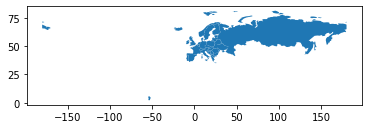

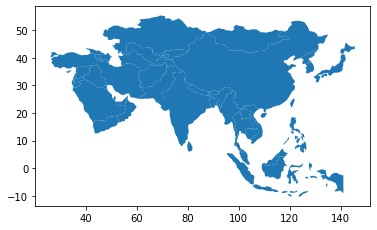

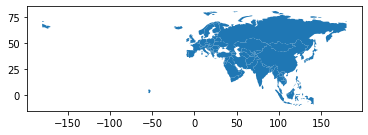

In [73]:
europe.plot()
asia.plot()
eurasia.plot()

### Attribute Joins
Attribute joins are accomplished using the merge method. In general, it is recommended to use the merge method called from the spatial dataset. With that said, the stand-alone merge function will work if the GeoDataFrame is in the left argument; if a DataFrame is in the left argument and a GeoDataFrame is in the right position, the result will no longer be a GeoDataFrame.

In [74]:
country_shapes.head()

,geometry,iso_a3
0,"MULTIPOLYGON (((180.00 -16.07, 180.00 -16.56, ...",FJI
1,"POLYGON ((33.90 -0.95, 34.07 -1.06, 37.70 -3.1...",TZA
2,"POLYGON ((-8.67 27.66, -8.67 27.59, -8.68 27.4...",ESH
3,"MULTIPOLYGON (((-122.84 49.00, -122.97 49.00, ...",CAN
4,"MULTIPOLYGON (((-122.84 49.00, -120.00 49.00, ...",USA


In [75]:
country_names.head()

,name,iso_a3
0,Fiji,FJI
1,Tanzania,TZA
2,W. Sahara,ESH
3,Canada,CAN
4,United States of America,USA


In [76]:
# Merge with `merge` method on shared variable (iso codes):
country_shapes = country_shapes.merge(country_names, on='iso_a3')

country_shapes.head()

,geometry,iso_a3,name
0,"MULTIPOLYGON (((180.00 -16.07, 180.00 -16.56, ...",FJI,Fiji
1,"POLYGON ((33.90 -0.95, 34.07 -1.06, 37.70 -3.1...",TZA,Tanzania
2,"POLYGON ((-8.67 27.66, -8.67 27.59, -8.68 27.4...",ESH,W. Sahara
3,"MULTIPOLYGON (((-122.84 49.00, -122.97 49.00, ...",CAN,Canada
4,"MULTIPOLYGON (((-122.84 49.00, -120.00 49.00, ...",USA,United States of America


### Spatial Joins
In a Spatial Join, two geometry objects are merged based on their spatial relationship to one another.

In [77]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45 41.90)
1,San Marino,POINT (12.44 43.94)
2,Vaduz,POINT (9.52 47.13)
3,Luxembourg,POINT (6.13 49.61)
4,Palikir,POINT (158.15 6.92)


In [78]:
# Execute spatial join
cities_with_country = geopandas.sjoin(cities, countries, how="inner", op='intersects')

cities_with_country.head()

,name,geometry,index_right,country
0,Vatican City,POINT (12.45 41.90),141,Italy
1,San Marino,POINT (12.44 43.94),141,Italy
192,Rome,POINT (12.48 41.90),141,Italy
2,Vaduz,POINT (9.52 47.13),114,Austria
184,Vienna,POINT (16.36 48.20),114,Austria


sjoin() has two core arguments: how and op.     
op = {'intersects', 'within','contains'}   
how = {'inner','left','right'}  

For additional commands, go through:

https://geopandas.org/reference.html